In [3]:
import os
from datetime import datetime
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
# from shapely.geometry import Point
import h5py
import sys
import rasterio
from matplotlib import cm
import matplotlib
import xarray as xr
import rioxarray as rxr
#import earthpy as et
#import earthpy.spatial as es
#import earthpy.plot as ep
%matplotlib inline

from constants import *

os.chdir(home_dir)

In [ ]:
# make color scheme
import matplotlib
import matplotlib.cm as cm
blues = cm.get_cmap('Blues', 256)
newcolors = blues(np.linspace(0, 1, 256))
white = np.array([1,1,1,0])
newcolors[:10, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

In [4]:
sn_watersheds= gpd.read_file('data/sn_watersheds.shp')
swe = rxr.open_rasterio('swe_max/swe_max_2001.tif')
f,ax=plt.subplots()
swe.plot(ax=ax)
sn_watersheds.boundary.plot(ax=ax)
mtbs = gpd.read_file('mtbs_perimeter_data/mtbs_perims_DD.shp')

### load in daily swe and max swe
daily_swe_avg = np.load('data/daily_swe_avg.npy',allow_pickle=True).tolist()
daily_swe_total = np.load('data/daily_swe_sum.npy',allow_pickle=True).tolist()
max_day = np.load('data/max_day.npy',allow_pickle=True)
max_swe = np.load('data/max_swe.npy',allow_pickle=True)
max_swe_max = np.load('data/max_swe_map.npy')

RasterioIOError: swe_max/swe_max_2001.tif: No such file or directory

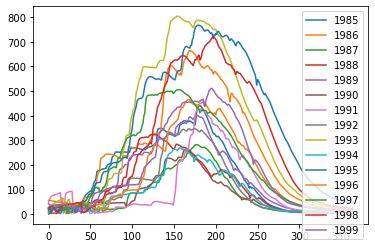

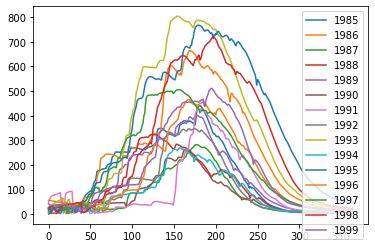

In [47]:
fig,ax=plt.subplots()
for i in range(1985,2000):
    tmp = daily_swe_total[i]
    ax.plot(tmp,label = str(i))
ax.legend()
fig,ax=plt.subplots()
for i in range(1985,2000):
    tmp = daily_swe_avg[i]
    ax.plot(tmp,label = str(i))
ax.legend()

NameError: name 'swe_april1' is not defined

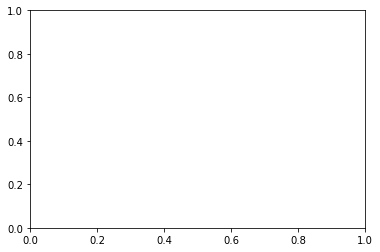

In [18]:
fig,ax=plt.subplots()
im = ax.imshow(swe_april1,cmap=newcmp,vmin=0,vmax=1000,
                            extent=(np.nanmin(lon),
                            np.nanmax(lon),
                            np.nanmin(lat),
                            np.nanmax(lat)))
fig.colorbar(im,ax=ax)
plt.show()

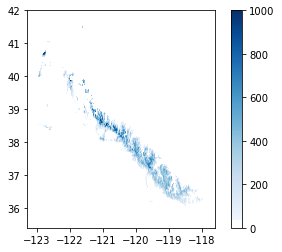

In [72]:
fig,ax=plt.subplots()
im = ax.imshow(swe_april1,cmap=newcmp,vmin=0,vmax=1000,
                            extent=(np.nanmin(lon),
                            np.nanmax(lon),
                            np.nanmin(lat),
                            np.nanmax(lat)))
fig.colorbar(im,ax=ax)
plt.show()

In [9]:
import rioxarray as rxr
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
os.chdir('/users/marianne/documents/pe_snow_fires')
sn_watersheds= gpd.read_file('data/sn_watersheds.shp')
# mtbs= gpd.read_file('mtbs_perimeter_data/mtbs_perims_DD.shp')
sn_geom = sn_watersheds.to_crs(dataset.rio.crs)
max_ndvi=[]
for yr in range(1980,2016):
    dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
    avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
    max_ndvi.append(np.nanmean(avhrr_clip.values))
    # print(np.nanmean(avhrr_clip.values))

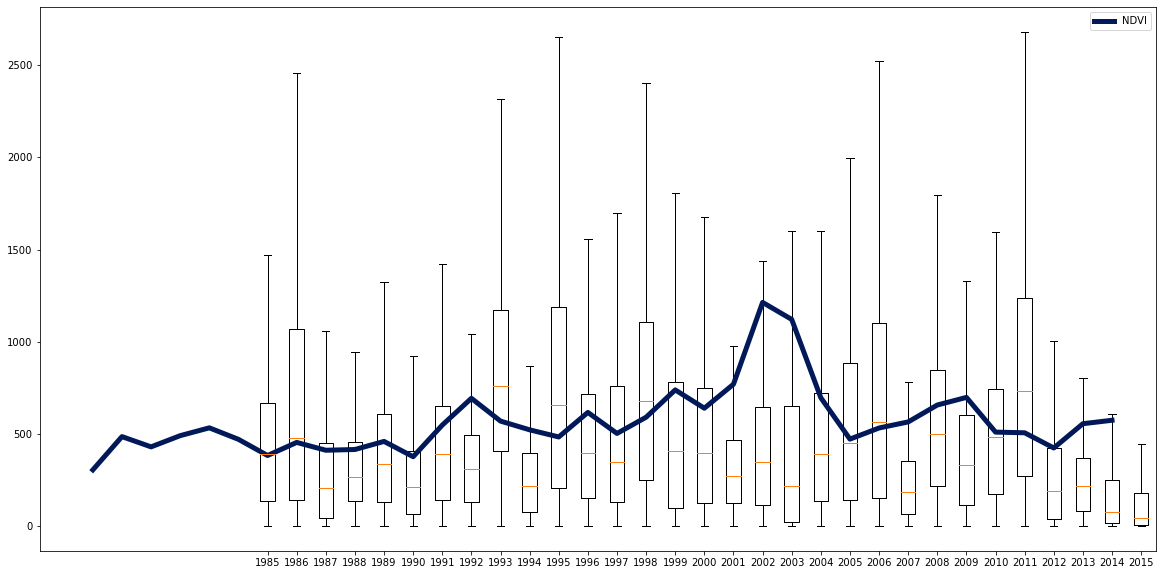

In [13]:
#!pip install cmcrameri
import matplotlib.pyplot as plt
cs = cm.batlow(np.linspace(0,1,7))

fig,ax = plt.subplots(figsize=(20,10))
# tmp = [april1swe[i] for i in range(1985,2016)]
tmp = [max_swe_map[i].flatten() for i in range(1985,2016)]
tmp = [tmp[i][tmp[i]>0] for i in range(len(tmp))]
ax.boxplot(tmp,showfliers=False,positions=range(1985,2016))
# fig.savefig('april1swe.jpg')
# plt.close()
# ax.plot(years_gpp,mean_april_gpp,'-',linewidth=5,color=cs[0] ,label = 'April GPP')
# ax.plot(years_gpp,mean_july_gpp,'-',linewidth=5,color=cs[3],label = 'July GPP')
# ax.plot(years_gpp,mean_august_gpp,'-',linewidth=5,color=cs[4],label = 'August GPP')
ax.plot(range(1979,2015), [i-2000 for i in max_ndvi],'-',linewidth = 5, color = cs[0],label='NDVI')
ax.legend()
plt.show()

NameError: name 'april1swe' is not defined

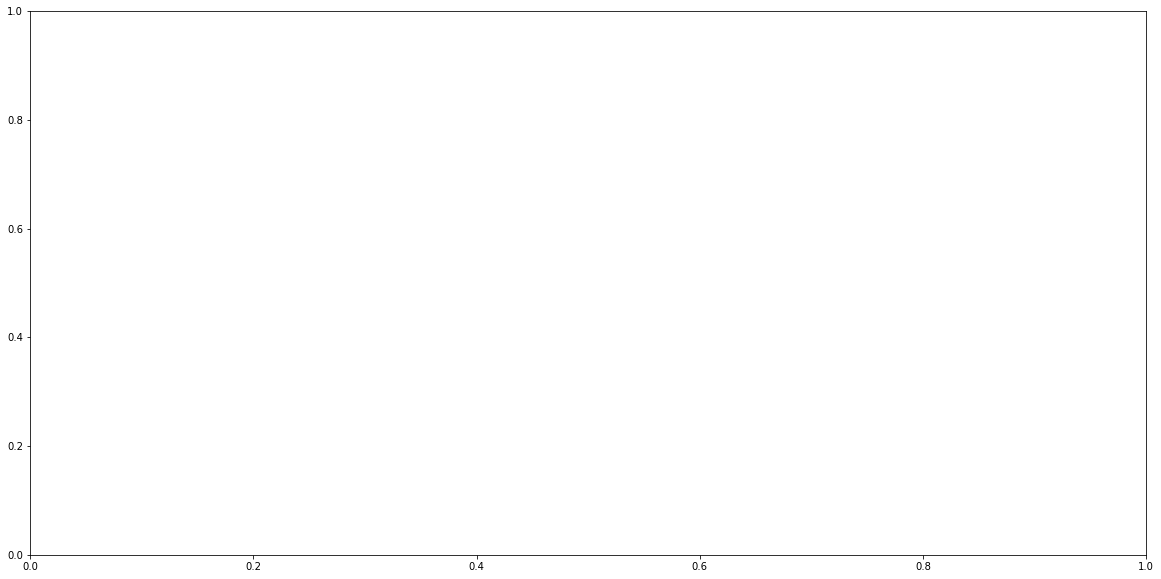

In [21]:
from cmcrameri import cm
cs = cm.batlow(np.linspace(0,1,7))

fig,ax = plt.subplots(figsize=(20,10))
#tmp = [april1swe[i] for i in range(1985,2016)]
#ax.boxplot(tmp,showfliers=False,positions=range(1985,2016))
ax.plot(years_gpp,mean_april_gpp,'-',linewidth=5,color=cs[0] ,label = 'April GPP')
ax.plot(years_gpp,mean_july_gpp,'-',linewidth=5,color=cs[3],label = 'July GPP')
ax.plot(years_gpp,mean_august_gpp,'-',linewidth=5,color=cs[4],label = 'August GPP')
ax.legend()
plt.show()